In [ ]:
import pandas as pd
import datetime as dt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/trip.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [ ]:
data.tail()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00
22700,Benjamin Miller,03/02/2017 1:02:49 PM,03/02/2017 1:16:09 PM,Cash,1,2.10,11.0,2.35,0.00


In [ ]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


In [ ]:
#결측치 갯수 확인
data.isna().sum()

,0
passenger_name,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
payment_method,0
passenger_count,0
trip_distance,0
fare_amount,3
tip_amount,0
tolls_amount,0


In [ ]:
#결측치 평균 확인
data.isna().mean()

,0
passenger_name,0.000000
tpep_pickup_datetime,0.000000
tpep_dropoff_datetime,0.000000
payment_method,0.000000
passenger_count,0.000000
trip_distance,0.000000
fare_amount,0.000132
tip_amount,0.000000
tolls_amount,0.000000


In [ ]:
#결측치 위치 확인
farena_index = data[data['fare_amount'].isna()].index
data.loc[farena_index]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
52,Benjamin Johnson,04/04/2017 4:22:03 PM,04/04/2017 4:35:30 PM,Cash,1,2.20,NaN,0.0,0.00
189,Maria Ibarra,08/21/2017 12:40:25 PM,08/21/2017 1:12:31 PM,Debit Card,3,15.20,NaN,5.0,0.00
244,Tina Avila,08/09/2017 8:32:09 AM,08/09/2017 9:31:11 AM,Cash,1,15.89,NaN,10.0,5.76


In [ ]:
#중간 값
data['fare_amount'].median()

9.5

In [ ]:
# 약 2만개 이상 표본에서 nan값은 3개로 확인 중간 값으로 채우기로 결정
data['fare_amount'] = data['fare_amount'].fillna(data['fare_amount'].median())
data.describe()


,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22701.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.023543,1.835745,0.312514
std,1.304942,3.653023,13.239261,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


<Axes: xlabel='None', ylabel='passenger_count'>

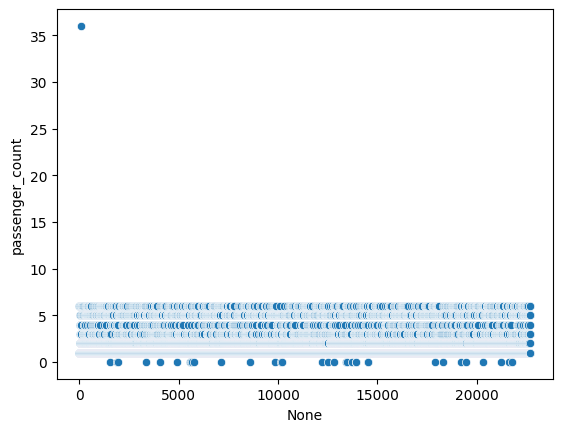

In [ ]:
#passenger_count 이상치 확인
sns.scatterplot(x= data.index, y=data['passenger_count'])

In [ ]:
#이상치 확인
data['passenger_count'].sort_values().tail()

,passenger_count
4047,6
21106,6
12249,6
12274,6
64,36


In [ ]:
#이상치 인덱스
data.loc[64]

,64
passenger_name,Manuel Dickson
tpep_pickup_datetime,10/05/2017 9:39:28 AM
tpep_dropoff_datetime,10/05/2017 9:42:32 AM
payment_method,Debit Card
passenger_count,36
trip_distance,0.22
fare_amount,21.5
tip_amount,0.0
tolls_amount,0.0


In [ ]:
#이상치 제거
data = data.drop(64,axis = 0)

<Axes: xlabel='None', ylabel='passenger_count'>

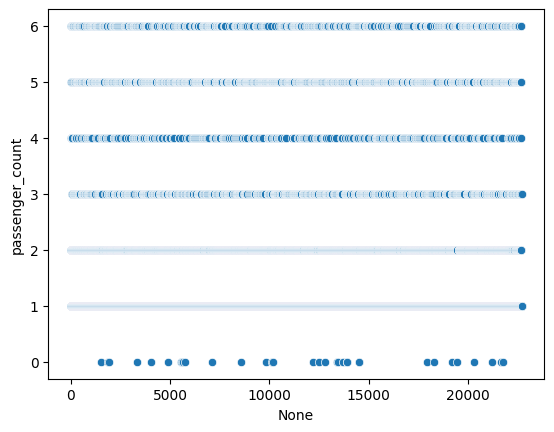

In [ ]:
sns.scatterplot(x= data.index, y=data['passenger_count'])

In [ ]:
data['trip_distance'].sort_values()

,trip_distance
22672,0.00
16265,0.00
22045,0.00
11514,0.00
8841,0.00
...,...
30,30.83
10293,31.95
6066,32.72
13863,33.92


<Axes: xlabel='None', ylabel='fare_amount'>

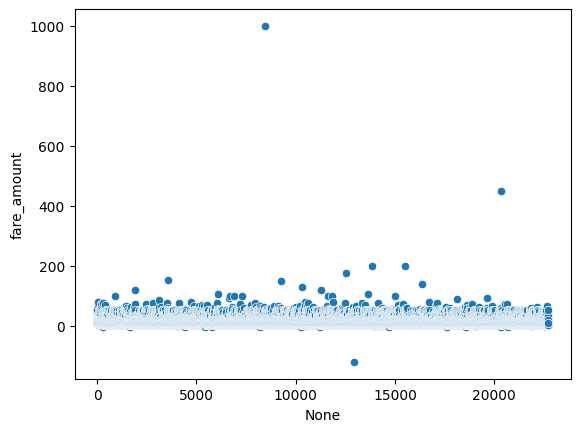

In [ ]:
sns.scatterplot(x= data.index, y=data['fare_amount'])

In [ ]:
data['fare_amount'].sort_values()

,fare_amount
12946,-120.00
11206,-4.50
20700,-4.50
14716,-4.00
17604,-4.00
...,...
12513,175.00
15476,200.00
13863,200.01
20314,450.00


In [ ]:
data.loc[8478]

,8478
passenger_name,Alexis Hanson
tpep_pickup_datetime,02/06/2017 5:50:10 AM
tpep_dropoff_datetime,02/06/2017 5:51:08 AM
payment_method,Credit Card
passenger_count,1
trip_distance,2.6
fare_amount,999.99
tip_amount,200.0
tolls_amount,0.0


In [ ]:
data.iloc[12945]

,12946
passenger_name,Patrick Herring
tpep_pickup_datetime,04/08/2017 12:00:16 AM
tpep_dropoff_datetime,04/08/2017 11:15:57 PM
payment_method,Cash
passenger_count,1
trip_distance,0.17
fare_amount,-120.0
tip_amount,0.0
tolls_amount,0.0


In [ ]:
data = data.drop(12946,axis = 0)
data = data.drop(8478,axis=0)
data = data.drop(20314,axis=0)

In [ ]:
data['fare_amount'].sort_values()

,fare_amount
11206,-4.50
20700,-4.50
17604,-4.00
14716,-4.00
20319,-3.50
...,...
9282,150.00
3584,152.00
12513,175.00
15476,200.00


<Axes: xlabel='None', ylabel='fare_amount'>

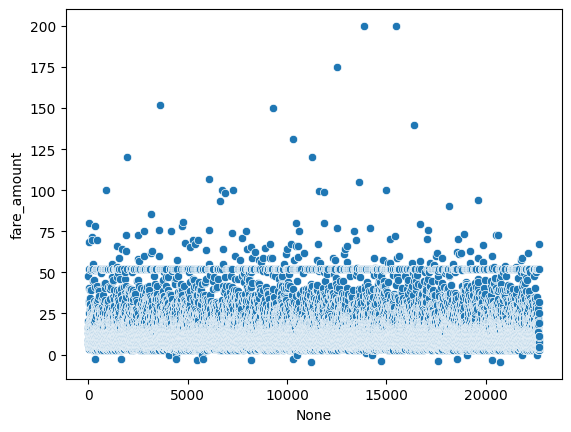

In [ ]:
sns.scatterplot(x= data.index, y=data['fare_amount'])

In [ ]:
data['tip_amount'].sort_values()

,tip_amount
18396,0.00
17673,0.00
13974,0.00
13972,0.00
5639,0.00
...,...
14827,28.00
986,42.29
12513,46.69
13863,51.64


In [ ]:
data

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


In [ ]:
#credit Card와 Debit Card를 구분없이 Card라는 이름으로 만들기
data['payment_method'] = data['payment_method'].replace({'Credit Card':'Card', 'Debit Card':'Card'})

In [ ]:
data

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Card,1,2.36,10.5,1.70,0.00


<Axes: xlabel='trip_distance', ylabel='fare_amount'>

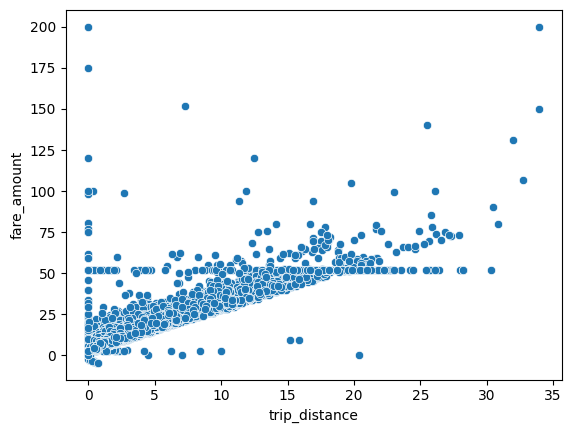

In [ ]:
acc = data[['trip_distance','fare_amount']].corr()
sns.scatterplot(x = data['trip_distance'], y = data['fare_amount'])